# GISC 606 Lab 1: Normalized Burn Ratio (NBR)

## Overview
* Part 1: Assess burn scars with satellite imagery and open-source GIS tools
* Part 2: Assigned readings and literature search
* Your Deliverable

## Part 1
Assess burn scars with satellite imagery
> Note: This tutorial was originally developed by Esri's Learn Team. You can find the official maintained version at [this location](https://learn.arcgis.com/en/projects/assess-burn-scars-with-satellite-imagery/). Additionally you can find other tutorials in the [tutorial gallery](https://learn.arcgis.com/en/gallery/).


You'll use Linux command line tools and Python to display multispectral imagery data and calculate a Normalized Burn Ratio spectral index. No prior Linux and minimal prior Python experience is required (I've provided all the code).


In [1]:
# Install dtrx, an extraction utility that simplifies user experience. 
# In a more real-life scenario you wouldn't necessarily do this step every time but only once. 
# In Google Colab, we get a fresh computer each time so need to reinstall each time. 
# https://pypi.org/project/dtrx/ 
!pip install dtrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Download the lab data from Esri
# We're only using the provided imagery, so will throw away the ArcGIS Pro project and other related files.
# https://man7.org/linux/man-pages/man1/wget.1.html
!wget -c https://www.arcgis.com/sharing/rest/content/items/1bc2bc1305b447fa939b937a8867114f/data -O MontanaFires

--2023-03-18 17:16:06--  https://www.arcgis.com/sharing/rest/content/items/1bc2bc1305b447fa939b937a8867114f/data
Resolving www.arcgis.com (www.arcgis.com)... 34.233.149.104, 52.23.2.231, 34.199.206.244, ...
Connecting to www.arcgis.com (www.arcgis.com)|34.233.149.104|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ago-item-storage.s3.us-east-1.amazonaws.com/1bc2bc1305b447fa939b937a8867114f/Montana_Fires.ppkx?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJIMEYCIQDwMLOQiMxcgjNY6JVJraNK1mqX7N9kZ7ixRrcLPxJwjAIhANh%2FL8EYvU1Z4WGPiNDIV0ois4UnHuwQi7da%2FnkB5QmeKrMFCEoQABoMNjA0NzU4MTAyNjY1IgzjbTe%2Bcm4YErRTRd4qkAUO5t9Na0YuEJCs0TIyBV6454R6coZ77850wteqBjrY3XwyBzSAOHzM1meAki92WxWuVn9EbQoc15wmEkix6Szy07DVN8ShiUvR%2B%2FMRC9%2BSk9inThmQI5s4dDhifyv3PctV1is85iuFBz6ZzQtvsH6GKdWlEXQCU66qX7ZgznetF3X1H4vlGgMmG7wo%2BvdJz68nuXZNlm8xzq8aSajvBrFgL9AFR0xC4hzcJlwgc49C4gB9S3pp11aTsKolytrY%2FNjr1xJGINnwr91%2BXXiScdRhnbQ0gbnVAFNnSCWM0q

In [3]:
# Extract the compressed MontanaFires file into an uncompressed folder
!dtrx MontanaFires

dtrx: WARNING: extracting /content/MontanaFires to MontanaFires.1
dtrx: WARNING: Error output from this process:

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
1 file, 55286077 bytes (53 MiB)

Extracting archive: /content/MontanaFires

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
1 file, 55286077 bytes (53 MiB)

Extracting archive: /content/MontanaFires


In [4]:
# Move a nested subdirectory in the extracted MontanaFires.1 directory to a new location 
# https://man7.org/linux/man-pages/man1/mv.1.html
!mv MontanaFires.1/commondata/raster_data raster_data

In [5]:
# Clean up your workspace by removing unnecessary folders and files
# https://man7.org/linux/man-pages/man1/rm.1.html
!rm MontanaFires
!rm -rf MontanaFires.1

In [6]:
# Display the contents of `raster_data` directory
# https://man7.org/linux/man-pages/man1/ls.1.html
!ls raster_data/

G_2014.tfw	    G_2014.tif.ovr  G_2015.tif		G_2015.tif.xml
G_2014.tif	    G_2014.tif.xml  G_2015.tif.aux.xml
G_2014.tif.aux.xml  G_2015.tfw	    G_2015.tif.ovr


In [7]:
# Install dependencies for rasterio then install rasterio
!sudo apt-get install python-numpy gdal-bin libgdal-dev
!pip install rasterio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgdal-dev is already the newest version (3.3.2+dfsg-2~focal2).
The following additional packages will be installed:
  libpython2-stdlib python-pkg-resources python2 python2-minimal python3-gdal
  python3-numpy
Suggested packages:
  libgdal-grass python-dev python-pytest python-numpy-dbg python-numpy-doc
  python-setuptools python2-doc python-tk python3-pytest python3-numpy-dbg
The following NEW packages will be installed:
  gdal-bin libpython2-stdlib python-numpy python-pkg-resources python2
  python2-minimal python3-gdal python3-numpy
0 upgraded, 8 newly installed, 0 to remove and 23 not upgraded.
Need to get 6,595 kB of archives.
After this operation, 32.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 python2-minimal amd64 2.7.17-2ubuntu4 [27.5 kB]
Get:2 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 python3-gdal amd

In [8]:
# Check the version of rasterio installed via command line
!rio --version

1.3.6


In [9]:
# Use rasterio command line tool to display image metadata for 2014 pre-fire imagery
!rio info raster_data/G_2014.tif --indent 2 --verbose

{
  "blockxsize": 128,
  "blockysize": 128,
  "bounds": [
    293145.0,
    5368815.0,
    331965.0,
    5405835.0
  ],
  "checksum": [
    60380,
    46082,
    62713,
    54361,
    65258,
    49523,
    7585,
    9098
  ],
  "colorinterp": [
    "gray",
    "undefined",
    "undefined",
    "undefined",
    "undefined",
    "undefined",
    "undefined",
    "undefined"
  ],
  "count": 8,
  "crs": "EPSG:32612",
  "descriptions": [
    "CoastalAerosol",
    "Blue",
    "Green",
    "Red",
    "NearInfrared",
    "ShortWaveInfrared_1",
    "ShortWaveInfrared_2",
    "Cirrus"
  ],
  "driver": "GTiff",
  "dtype": "uint32",
  "height": 1234,
  "indexes": [
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8
  ],
  "interleave": "pixel",
  "lnglat": [
    -113.54309087246986,
    48.610902473885105
  ],
  "mask_flags": [
    [
      "nodata"
    ],
    [
      "nodata"
    ],
    [
      "nodata"
    ],
    [
      "nodata"
    ],
    [
      "nodata"
    ],
    [
      "nodata"
    ],


In [10]:
# Do the same thing for the 2015 post-fire imagery but save to a JSON file
!rio info raster_data/G_2015.tif --indent 2 --verbose > G_2015.json

In [11]:
# Let's switch to Python now
# Notice how we stop using ! since we're no longer trying to invoke Linux command line tools
# We're importing the `json` library and opening the JSON file we just created with rio
import json

with open("G_2015.json") as f:
  info_2015 = json.load(f)

In [12]:
# Let's display the JSON "dictionary keys"
info_2015.keys()

dict_keys(['blockxsize', 'blockysize', 'bounds', 'checksum', 'colorinterp', 'count', 'crs', 'descriptions', 'driver', 'dtype', 'height', 'indexes', 'interleave', 'lnglat', 'mask_flags', 'nodata', 'res', 'shape', 'stats', 'tiled', 'transform', 'units', 'width'])

In [13]:
# And we can display a specific key value
info_2015["descriptions"]

['CoastalAerosol',
 'Blue',
 'Green',
 'Red',
 'NearInfrared',
 'ShortWaveInfrared_1',
 'ShortWaveInfrared_2',
 'Cirrus']

In [15]:
# Determine the CRS of 2015 imagery data here
info_2015['crs']
info_2015['']

'EPSG:32612'

## Question 1 (double-click this cell and write your answer below the question)
### Part A
What are the band names for the 2015 imagery data?
* aka `info_2015["descriptions"]`

'CoastalAerosol',
 'Blue',
 'Green',
 'Red',
 'NearInfrared',
 'ShortWaveInfrared_1',
 'ShortWaveInfrared_2',
 'Cirrus'

### Part B
Using the blank code cell above, determine the CRS of the 2015 imagery data. You can copy+paste the preceeding code cell, but make sure to replace "description" with "crs".

In [16]:
# Import `rasterio` and some support libraries for performing array computation (multispectral images are big arrays) and visualizing data
import rasterio
from matplotlib import pyplot as plt
from rasterio.plot import show, show_hist
import numpy as np

In [17]:
# Load the data set into rasterio
data_14 = rasterio.open("raster_data/G_2014.tif")
data_15 = rasterio.open("raster_data/G_2015.tif")

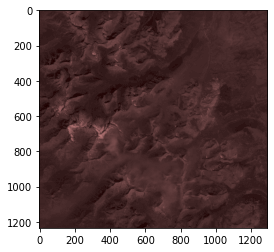

In [18]:
# Plot one of the bands
plt.imshow(data_15.read(3), cmap="pink")
plt.show()

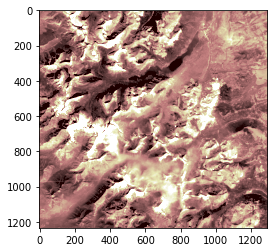

In [19]:
# Apply super basic contrast stretching
img=data_15.read(3)
vmin, vmax = np.nanpercentile(img, (5,95))  # 5-95% stretch
img_plt = plt.imshow(img, cmap='pink', vmin=vmin, vmax=vmax)
plt.show()

In [20]:
# Convenience function to normalize data to 0-1 scale
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

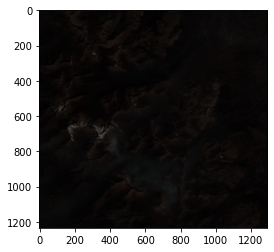

In [21]:
# Load RGB data from 2015 into memory, normalize, then display
red = data_15.read(3)
green = data_15.read(2)
blue = data_15.read(1)

redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)

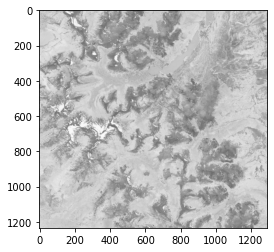

In [22]:
# Calculate NBR for 2014 and display the result
band_5_14 = data_14.read(5)
band_7_14 = data_14.read(7)

n5 = normalize(band_5_14)
n7 = normalize(band_7_14)

nbr_14 = (n5 - n7) / (n5 + n7)

plt.imshow(nbr_14, cmap="gray")
plt.show()

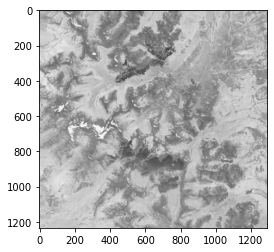

In [23]:
# Calculate NBR for 2015 and display the result
band_5_15 = data_15.read(5)
band_7_15 = data_15.read(7)

n5 = normalize(band_5_15)
n7 = normalize(band_7_15)

nbr_15 = (n5 - n7) / (n5 + n7)



plt.imshow(nbr_15, cmap="gray")
plt.show()

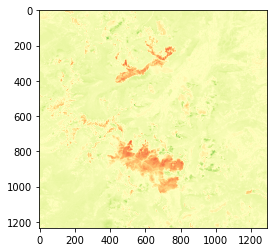

In [24]:
# Derive NBR difference then plot it
nbr_delta = nbr_15 - nbr_14

plt.imshow(nbr_delta, cmap="RdYlGn")
plt.show()

In [25]:
# Convenience function to apply standard deviation contrast stretch to an array
import math
# https://stackoverflow.com/questions/59813350/create-new-raster-tif-from-standard-deviation-stretched-bands-works-with-dst
def std_stretch_data(data, n=2):
    """Applies an n-standard deviation stretch to data."""

    # Get the mean and n standard deviations.
    mean, d = data.mean(), data.std() * n

    # Calculate new min and max as integers. Make sure the min isn't
    # smaller than the real min value, and the max isn't larger than
    # the real max value.
    new_min = math.floor(max(mean - d, data.min()))
    new_max = math.ceil(min(mean + d, data.max()))

    # Convert any values smaller than new_min to new_min, and any
    # values larger than new_max to new_max.
    data = np.clip(data, new_min, new_max)

    # Scale the data.
    data = (data - data.min()) / (new_max - new_min)
    return data


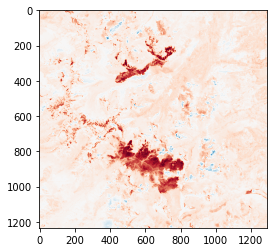

In [26]:
# Apply standard deviation contrast stretching to enhance NBR difference raster then display
std_stretched = std_stretch_data(nbr_delta)
plt.imshow(std_stretched, cmap="RdBu")
plt.show()

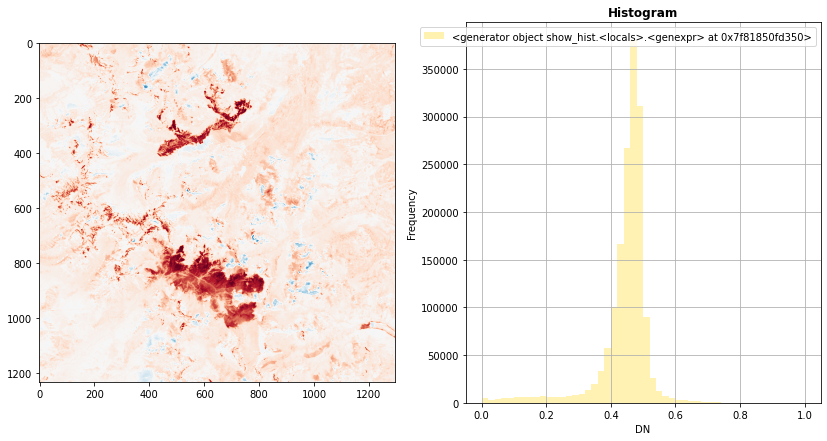

In [27]:
# Display stretched data and a corresponding histogram
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show(std_stretched, ax=axrgb, cmap="RdBu")
show_hist(std_stretched, bins=50, histtype='stepfilled', lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()

In [28]:
# Save NBR difference raster to file
with rasterio.open(
    "nbr_delta.tif", 
    "w", 
    driver="GTiff", 
    height=data_15.shape[0], 
    width=data_15.shape[1], 
    dtype=red.dtype, 
    count=1, 
    crs='+proj=latlong', 
    transform=data_15.transform
    ) as dst:
  dst.write(nbr_delta, 1)

In [29]:
# Display directory contents
!ls

G_2015.json  nbr_delta.tif  raster_data  sample_data


## Question 2:
Please use `rio` to display information about the `nbr_delta.tif` data set to your command line output. Use the empty code cell below this question.

In [31]:
!rio info nbr_delta.tif --indent 2 --verbose

{
  "blockysize": 1,
  "bounds": [
    293145.0,
    5368815.0,
    331965.0,
    5405835.0
  ],
  "checksum": [
    28255
  ],
  "colorinterp": [
    "gray"
  ],
  "count": 1,
  "crs": "EPSG:4326",
  "descriptions": [
    null
  ],
  "driver": "GTiff",
  "dtype": "uint32",
  "height": 1234,
  "indexes": [
    1
  ],
  "interleave": "band",
  "lnglat": [
    312555.0,
    5387325.0
  ],
  "mask_flags": [
    [
      "all_valid"
    ]
  ],
  "nodata": null,
  "res": [
    30.0,
    30.0
  ],
  "shape": [
    1234,
    1294
  ],
  "stats": [
    {
      "max": 4294967295.0,
      "mean": 8305919.483116624,
      "min": 0.0,
      "std": 188691982.4381031
    }
  ],
  "tiled": false,
  "transform": [
    30.0,
    0.0,
    293145.0,
    0.0,
    -30.0,
    5405835.0,
    0.0,
    0.0,
    1.0
  ],
  "units": [
    null
  ],
  "width": 1294
}


## Part 2
### Assigned readings
* [Mapping Burns and Natural Reforestation using Thematic Mapper Data by Lopez Garcia, M., and V. Caselles](https://www.researchgate.net/publication/246761915_Mapping_burns_and_natural_reforestation_using_Thematic_Mapper_data)
* [Landscape Assessment: Remote Sensing of Severity, the Normalized Burn Ratio; and Ground Measure of Severity, the Composite Burn Index by Key, C. and N. Benson, N](https://www.researchgate.net/publication/241687027_Landscape_Assessment_Ground_measure_of_severity_the_Composite_Burn_Index_and_Remote_sensing_of_severity_the_Normalized_Burn_Ratio)

## Your Deliverable
### Part 1
Save a copy of your Notebook in the GitHub repository you created during Lab 0. 
* Click File > Download > Download .ipynb
* Navigate to your GitHub repo (created during Lab 0) and make sure that you're logged into GitHub
* Click Add file > Upload files
* Select the .ipynb file you saved
* Paste the link to your uploaded file in the GitHub issue you opened last week in this repo: https://github.com/alex-pakalniskis/gisc606-spring2023



### Part 2
Please write a 2-4 sentence summary (paraphrase in your own words) about each article then compile your results into JSON format. Follow the steps below to submit your JSON data.
> Note: The steps may contain links with additional explanations to provide you with missing context.

1. Login to your GitHub account if you aren't already logged in
1. Navigate to [https://github.com/alex-pakalniskis/gisc606-spring2023](https://github.com/alex-pakalniskis/gisc606-spring2023)
1. [Create a branch](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/creating-and-deleting-branches-within-your-repository#creating-a-branch-using-the-branch-dropdown) of `alex-pakalniskis/gisc606-spring2023` from `main` branch using the branch dropdown
    1. Title your branch `lab 1: your csulb email without @csulb.edu`, i.e. mine would be `lab 1: alex.pakalniskis`
1. Create a file called `your-email-without-@csulb.edu.json`, i.e. mine would be `alex-pakalniskis.json` in the `gisc606-spring/lab1` subdirectory.
1. Copy the contents of Part 2's submission template (see below) into `your-email-without-@csulb.edu.json` then update with your information. 
1. [Merge your changes](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/creating-a-pull-request#creating-the-pull-request) into `main` branch by opening a pull request
1. [Request a review](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/requesting-a-pull-request-review) from @alex-pakalniskis

#### Part 2 Submission Template

``` json
{
    "your_name": "Alex Pakalniskis",
    "your_csulb_email": "alex.pakalniskis@csulb.edu",
    "articles": [
      {
        "title": "Mapping Burns and Natural Reforestation using Thematic Mapper Data",
        "authors": "Lopez Garcia, M., and V. Caselles",
        "link": "https://www.researchgate.net/publication/246761915_Mapping_burns_and_natural_reforestation_using_Thematic_Mapper_data",
        "your_summary": "In two to four sentences, paraphrase the content of the article (your own words)."
      },
      {
        "title": "Landscape Assessment: Remote Sensing of Severity, the Normalized Burn Ratio; and Ground Measure of Severity, the Composite Burn Index.",
        "authors": "Key, C. and N. Benson, N",
        "link": "https://www.researchgate.net/publication/241687027_Landscape_Assessment_Ground_measure_of_severity_the_Composite_Burn_Index_and_Remote_sensing_of_severity_the_Normalized_Burn_Ratio",
        "your_summary": "In two to four sentences, paraphrase the content of the article (your own words)."
      }
    ]
}
```

